In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [2]:
data = pd.read_csv('unemployment_rate_by_age_groups.csv')

In [3]:
data.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area Type  194 non-null    object 
 1   Area Name  194 non-null    object 
 2   Date       194 non-null    object 
 3   Year       194 non-null    int64  
 4   Month      194 non-null    object 
 5   Age 16-19  194 non-null    float64
 6   Age 20-24  194 non-null    float64
 7   Age 25-34  194 non-null    float64
 8   Age 35-44  194 non-null    float64
 9   Age 45-54  194 non-null    float64
 10  Age 55-64  194 non-null    float64
 11  Age 65+    194 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 18.3+ KB


In [5]:
data.isnull().sum()

Area Type    0
Area Name    0
Date         0
Year         0
Month        0
Age 16-19    0
Age 20-24    0
Age 25-34    0
Age 35-44    0
Age 45-54    0
Age 55-64    0
Age 65+      0
dtype: int64

# Overview Of Data

In [6]:
num_areas = data['Area Name'].nunique()
num_areas

1

Only one area exist ie California

In [7]:
unique_dates = data['Date'].unique()
num_unique_dates = len(unique_dates)
num_unique_dates

194

In [8]:
unique_years = data['Year'].unique()
num_unique_years = len(unique_years)
num_unique_years

17

# Age Analysis:

## 1. Univariate Analysis:
#### For each numerical column (age groups), compute summary statistics such as mean, median, and standard deviation. Plot histograms to visualize the distribution of age groups.

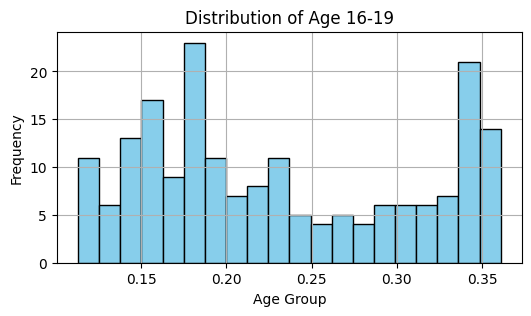

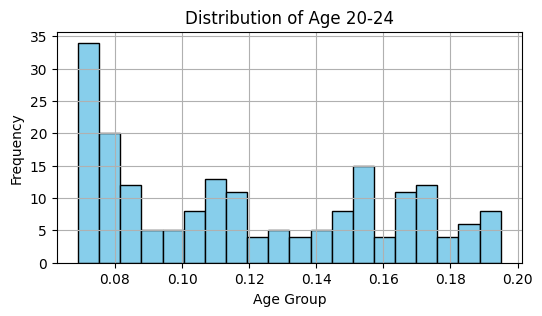

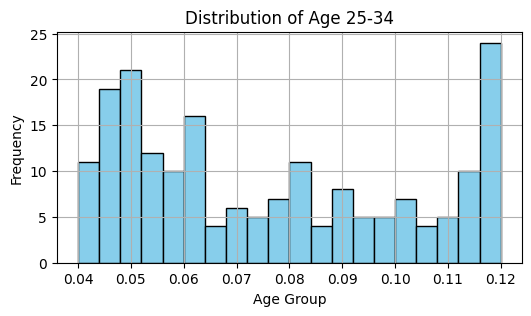

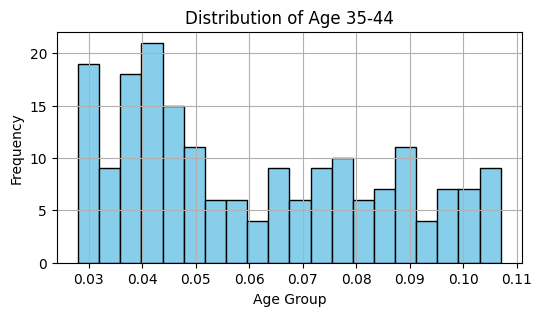

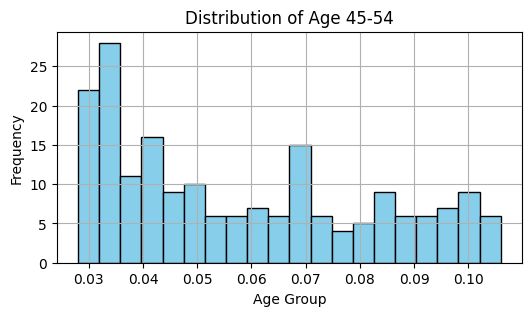

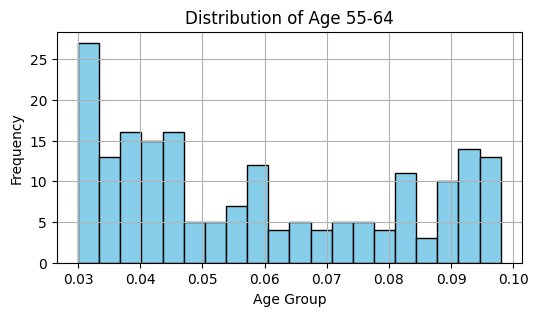

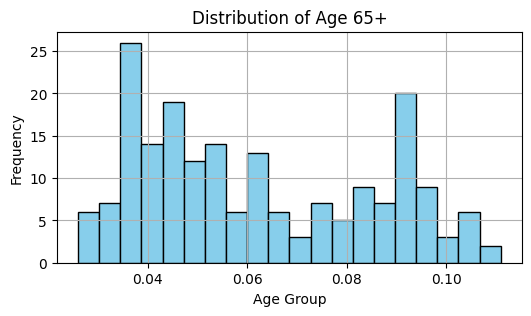

In [9]:
age_groups = ['Age 16-19', 'Age 20-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65+']
for age_group in age_groups:
    plt.figure(figsize=(6, 3))
    plt.hist(data[age_group], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {age_group}')
    plt.xlabel('Age Group')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## 2. Bivariate Analysis:
#### Explore relationships between age groups and other variables, such as year or month. You can use scatter plots or box plots for this purpose.

<Figure size 1000x600 with 0 Axes>

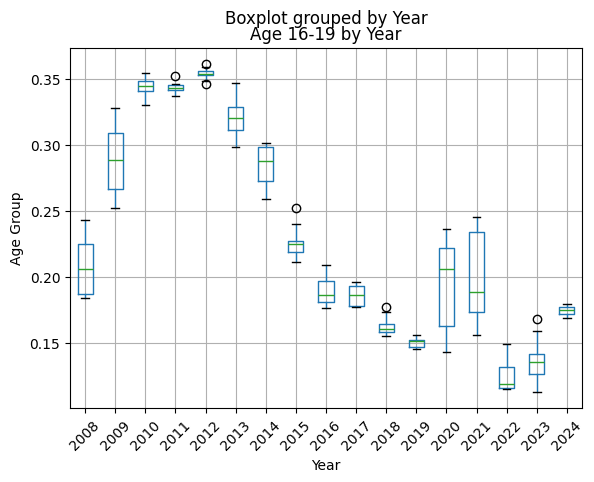

<Figure size 1000x600 with 0 Axes>

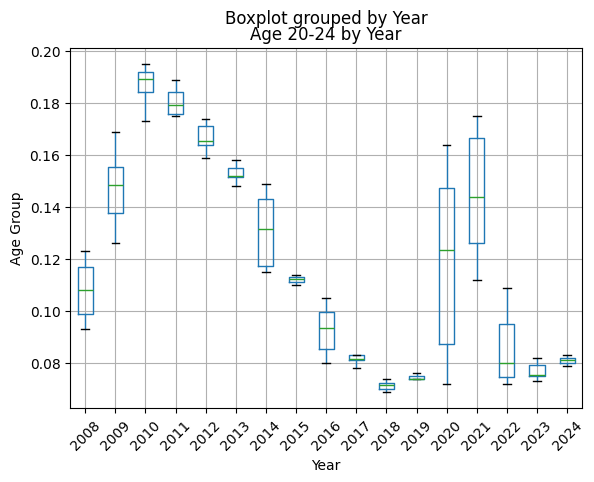

<Figure size 1000x600 with 0 Axes>

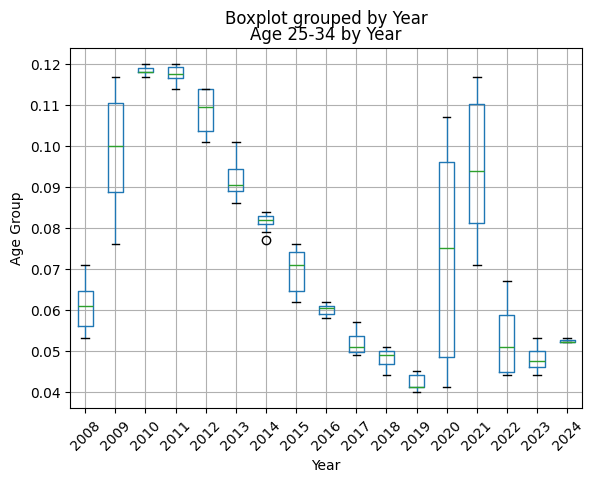

<Figure size 1000x600 with 0 Axes>

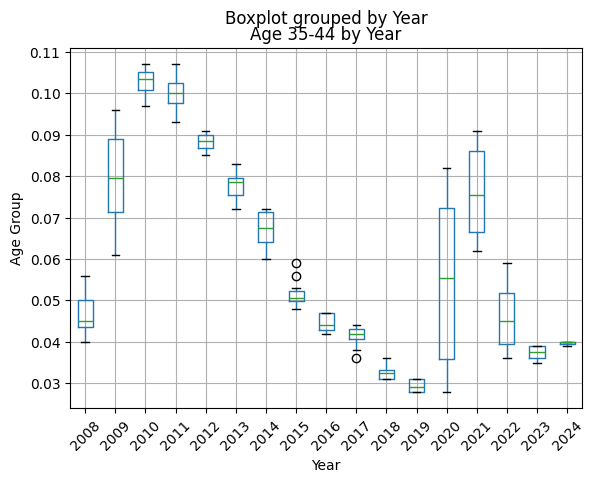

<Figure size 1000x600 with 0 Axes>

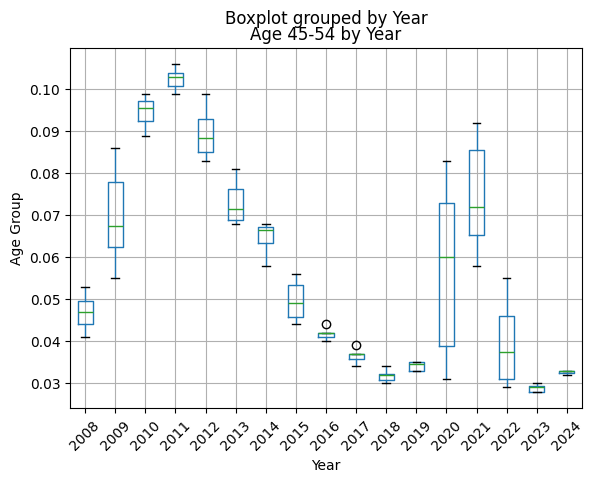

<Figure size 1000x600 with 0 Axes>

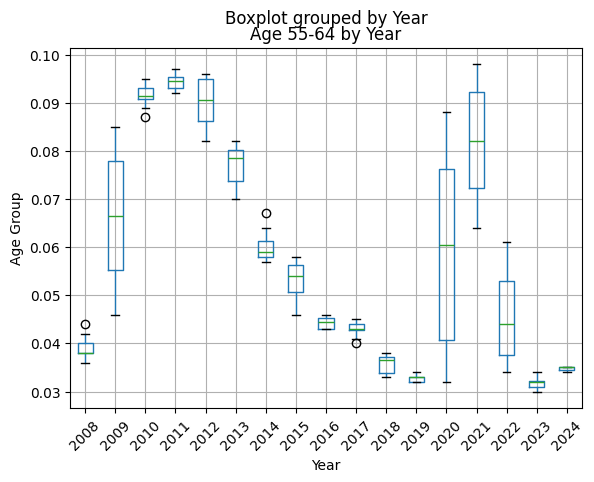

<Figure size 1000x600 with 0 Axes>

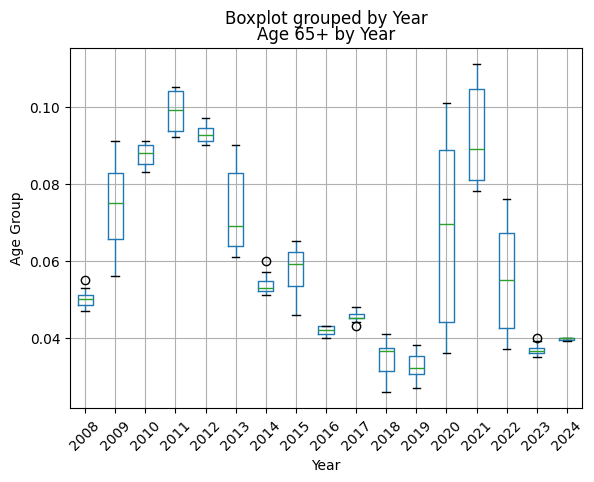

In [10]:
for age_group in age_groups:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=age_group, by='Year')
    plt.title(f'{age_group} by Year')
    plt.xlabel('Year')
    plt.ylabel('Age Group')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## 3. Multivariate Analysis:
#### Explore relationships between multiple variables simultaneously. You can use correlation matrices or pair plots for this purpose.

In [11]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()
correlation_matrix

,Year,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
Year,1.000000,-0.761682,-0.615580,-0.586112,-0.581867,-0.581044,-0.470269,-0.410765
Age 16-19,-0.761682,1.000000,0.915323,0.903071,0.902679,0.902939,0.857346,0.759382
Age 20-24,-0.615580,0.915323,1.000000,0.983642,0.984693,0.981249,0.959925,0.913022
Age 25-34,-0.586112,0.903071,0.983642,1.000000,0.989588,0.983435,0.972584,0.934473
Age 35-44,-0.581867,0.902679,0.984693,0.989588,1.000000,0.980844,0.968382,0.923345
Age 45-54,-0.581044,0.902939,0.981249,0.983435,0.980844,1.000000,0.977211,0.935918
Age 55-64,-0.470269,0.857346,0.959925,0.972584,0.968382,0.977211,1.000000,0.959983
Age 65+,-0.410765,0.759382,0.913022,0.934473,0.923345,0.935918,0.959983,1.000000


#### Heatmap

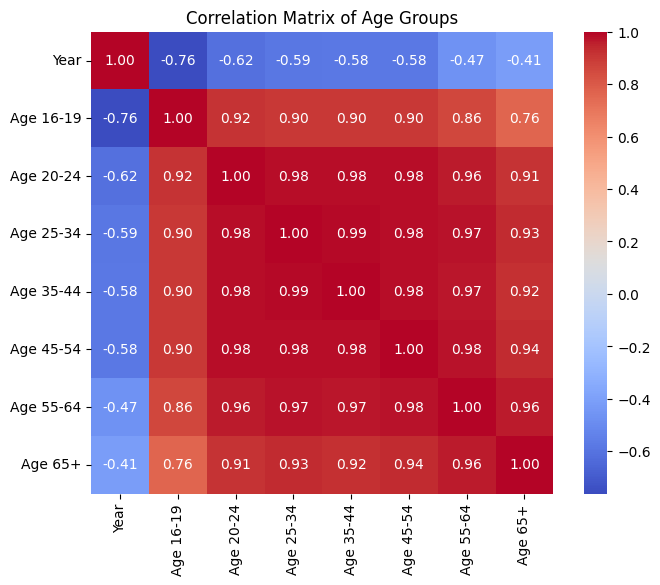

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Age Groups')
plt.show()

## 4. Poplulation dustribution over time

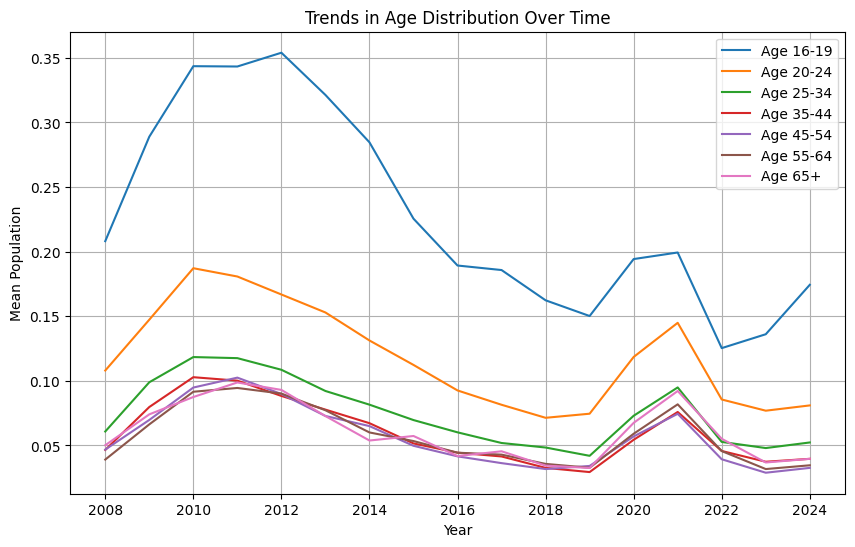

In [15]:
age_group_trends = data.groupby('Year')[age_groups].mean()

plt.figure(figsize=(10, 6))
for age_group in age_groups:
    plt.plot(age_group_trends.index, age_group_trends[age_group], label=age_group)

plt.title('Trends in Age Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly Detection:
#### We can use statistical methods or machine learning techniques to identify anomalies or outliers in the data. For example, we can detect outliers based on z-scores or leverage machine learning algorithms such as Isolation Forest or One-Class SVM.


In [16]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(numeric_data)
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

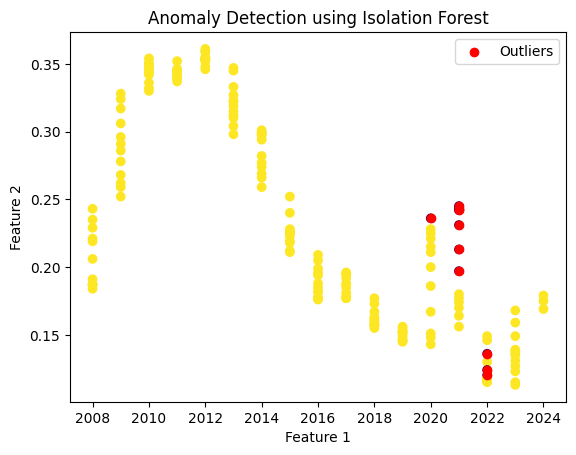

In [17]:
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=outliers, cmap='viridis')
plt.scatter(numeric_data.iloc[outliers == -1, 0], numeric_data.iloc[outliers == -1, 1], c='red', label='Outliers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()